# Analysis of the data

This analysis focus in compare the similarites of the domestic hot water (DHW) and electrical energy (to heat the water) consumptions between differents apartments from the same building

In this case it will be analyzed 3 apartments, they will be called:
- 25
- 34
- 64

This first analysis will be done for a short period of time, so it will be possible to examine the patterns in a shorter scale of time 

**1) Import of the packages and libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.stattools import acf

**2) Import of the data**

A random data was chosen: from 26/01/2021 to 31/01/2021

The important aspect is the duration, 5 days, because a analysis for short periods of time will be done

Nomenclature of the data:

- df(ap.)() - electrical consumptions        
- df(ap.)(w) - water consumption

After pd.read_csv (insert location of the file in your computer)

In [2]:
#Energy Consumption
df25 = pd.read_csv ('/Users/belin/OneDrive/Documentos/Donnes_Pird/25-EC.csv', parse_dates=['Date'], index_col=['Date'])
df25 = df25 ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

df34 = pd.read_csv ('/Users/belin/OneDrive/Documentos/Donnes_Pird/34-EC.csv', parse_dates=['Date'], index_col=['Date'])
df34 = df34 ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

df64 = pd.read_csv ('/Users/belin/OneDrive/Documentos/Donnes_Pird/64-EC.csv', parse_dates=['Date'], index_col=['Date'])
df64 = df64 ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

#DHW
df25w = pd.read_csv ('/Users/belin/OneDrive/Documentos/Donnes_Pird/25-IECS.csv', parse_dates=['Date'], index_col=['Date'])
df25w = df25w ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

df34w = pd.read_csv('/Users/belin/OneDrive/Documentos/Donnes_Pird/34-IECS.csv', parse_dates=['Date'], index_col=['Date'])
df34w = df34w ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

df64w = pd.read_csv('/Users/belin/OneDrive/Documentos/Donnes_Pird/64-IECS.csv', parse_dates=['Date'], index_col=['Date'])
df64w = df64w ['2021-01-26 00:00:00' : '2021-01-31 00:00:00']

**3) Resample the data in a time step of 1 hour**

The data is measured approximately each 3 minutes, so in order to have a better analysis during 5 days a resample of the data in a time step of 1 hour will be done

Resampling the data in time steps of 1 hour it will give 120 values

In [3]:
#Energy consumption
s25 = df25.Value.resample('H').mean() 
s34 = df34.Value.resample('H').mean() 
s64 = df64.Value.resample('H').mean() 

#DHW
s25w = df25w.Value.resample('H').mean() 
s34w = df34w.Value.resample('H').mean() 
s64w = df64w.Value.resample('H').mean() 

**4) Correlation analysis**

A creation of a correlation matrix is a great tool to help analyzing the similarites between the data

Down below 2 matrix are created, one for energy consumption and another for DHW consumption

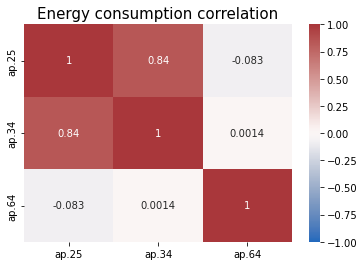

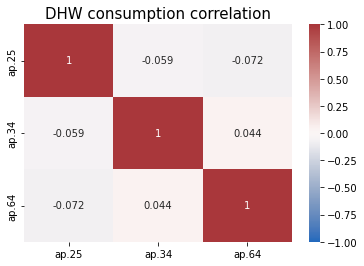

In [4]:
#Energy
matriz_corre = {'ap.25' : s25,
                'ap.34' : s34,
                'ap.64' : s64}
df_matriz = pd.DataFrame(matriz_corre)
df1_matriz = df_matriz.corr()
sn.heatmap(df1_matriz, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('Energy consumption correlation', fontsize=15)
plt.show()

#DWH
matriz_corre_w = {'ap.25' : s25w,
                'ap.34' : s34w,
                'ap.64' : s64w}
df_matriz_w = pd.DataFrame(matriz_corre_w)
df1_matriz_w = df_matriz_w.corr()
sn.heatmap(df1_matriz_w, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.title('DHW consumption correlation', fontsize=15)
plt.show()

**5) Visualization of the data of the 3 apartments**

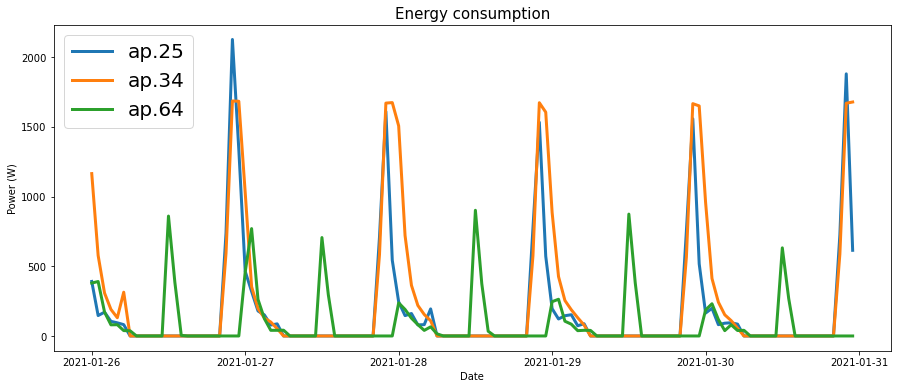

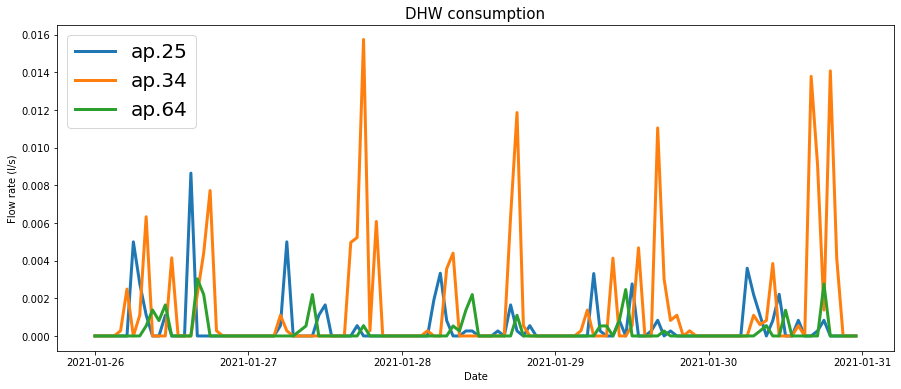

In [5]:
#Energy
plt.figure(figsize=(15,6))
plt.plot(s25, label='ap.25', lw=3 ) 
plt.plot(s34, label='ap.34', lw=3 )
plt.plot(s64, label='ap.64', lw=3 )
plt.xlabel('Date')
plt.ylabel('Power (W)')
plt.title('Energy consumption', fontsize=15)
plt.legend(loc='upper left', fontsize=20)
plt.show()

#DHW
plt.figure(figsize=(15,6))
plt.plot(s25w, label='ap.25', lw=3 ) 
plt.plot(s34w, label='ap.34', lw=3 )
plt.plot(s64w, label='ap.64', lw=3 )
plt.xlabel('Date')
plt.ylabel('Flow rate (l/s)')
plt.title('DHW consumption', fontsize=15)
plt.legend(loc='upper left', fontsize=20)
plt.show()

After evaluated the correlation matrix and the graphs, it is possible to affirm:

- Energy consumption: 
    - ap.25 and 34 present similar behavior, with peaks in the night and smaller peaks in the morning
    - ap.64 presents a different behavior with peaks in the afternoon
- DHW consumption: 
    - None of the 3 apartments showed similar behavior